# Flight Price Prediction

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. 

Here we will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# Importing Data

In [1]:
import pandas as pd
Flight_Train=pd.read_excel("Flight_Train.xlsx") #reading Flight_Train.xlsx file
Flight_Train.head() #Looking into top 5 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
Flight_Train.shape #Checking the shape of our data

(10683, 11)

In [3]:
Flight_Train.dtypes #Checking the datatype of each attribute

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

As per problem statement Target variable i.e. Price is int64 i.e. continuous. so we'll use Reqression to learn our model.

# Handling Null Values

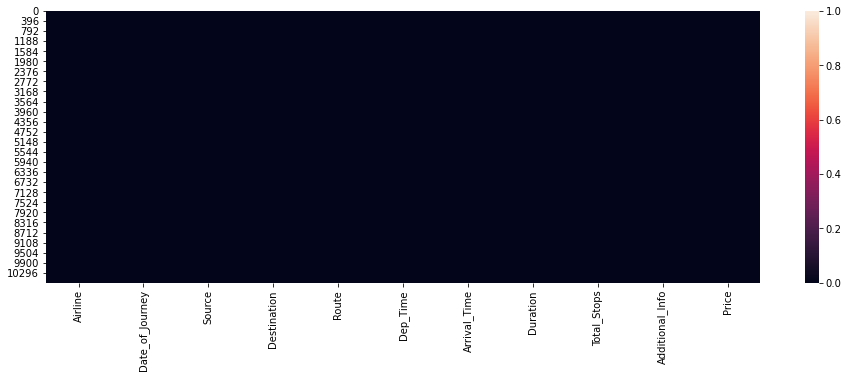

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (16,5))
sns.heatmap(Flight_Train.isnull()) #Looking for null values if any, in heatmap

In [5]:
print(Flight_Train.isnull().sum(axis = 0))

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [6]:
#Replacing null values with mode becuase the type of objects are object
Flight_Train['Route'].fillna(Flight_Train['Route'].mode()[0], inplace=True)
Flight_Train['Total_Stops'].fillna(Flight_Train['Total_Stops'].mode()[0], inplace=True)

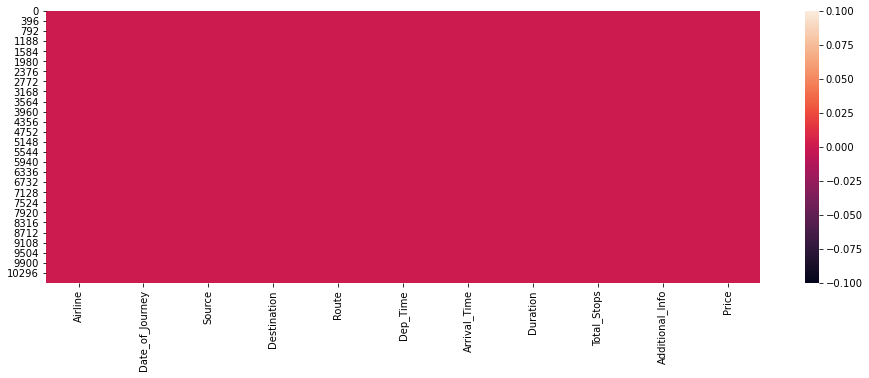

In [7]:
plt.figure(figsize = (16,5))
sns.heatmap(Flight_Train.isnull()) #Looking for null values if any, in heatmap

Here we are performing some feature engineering step for EDA just to get better clearity of data.

## Univariate Analysis

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


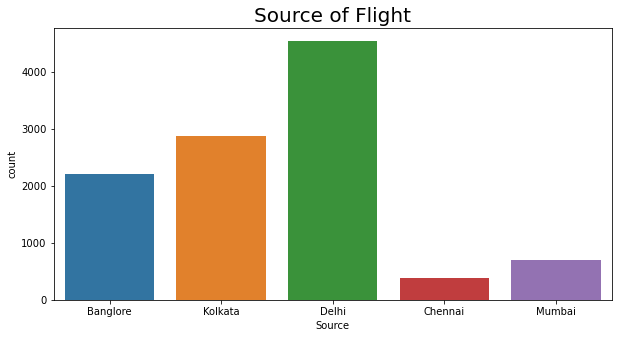

In [8]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print(Flight_Train['Source'].value_counts())
plt.figure(figsize = (10,5))
sns.countplot(x="Source", data=Flight_Train)
plt.title("Source of Flight", fontsize = 20)
plt.show()

We can clearly see that Maximum number of Filght Source was Delhi or we can say 4537 Flights source was Delhi.

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


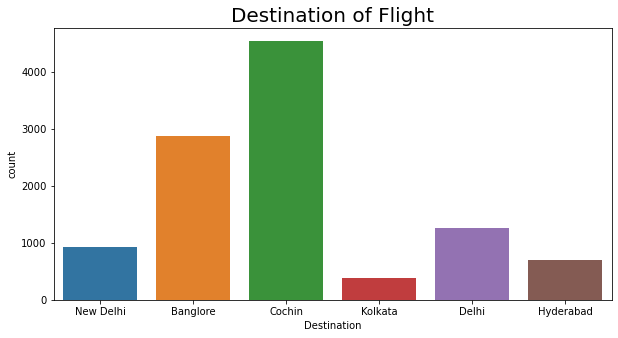

In [9]:
print(Flight_Train['Destination'].value_counts())
plt.figure(figsize = (10,5))
sns.countplot(x="Destination", data=Flight_Train)
plt.title("Destination of Flight", fontsize = 20)
plt.show()

4537 Flight Destination was Cochin i.e. Maximum

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


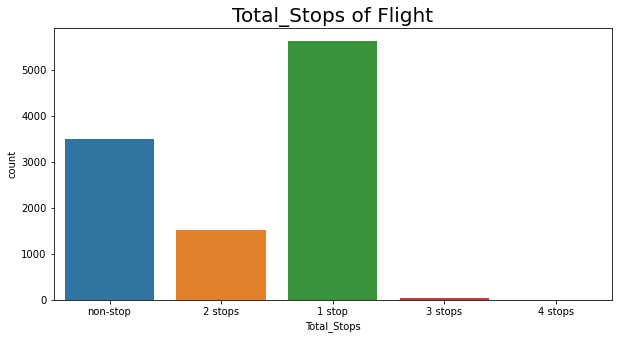

In [10]:
print(Flight_Train['Total_Stops'].value_counts())
plt.figure(figsize = (10,5))
sns.countplot(x="Total_Stops", data=Flight_Train)
plt.title("Total_Stops of Flight", fontsize = 20)
plt.show()

Most of the flights were having 1stop i.e. 5626 or 0stops i.e. 3491

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


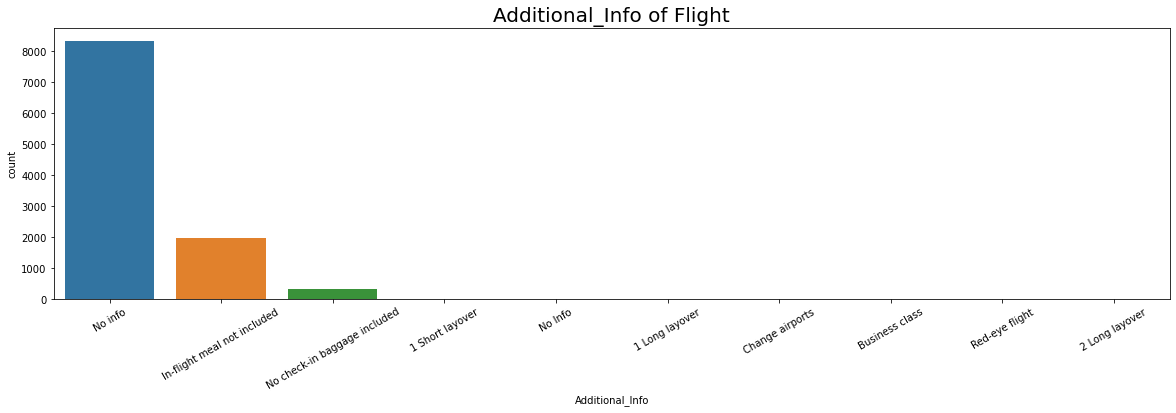

In [11]:
print(Flight_Train['Additional_Info'].value_counts())
plt.figure(figsize = (20,5)) #Plotting with size of 10 * 5
ax=sns.countplot(x="Additional_Info", data=Flight_Train) #Plotting Countplot for Additional_Info
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Additional_Info of Flight", fontsize = 20) #Setting up the title
plt.show() #plotting the graph

Generally there was no Infomation in flight.

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


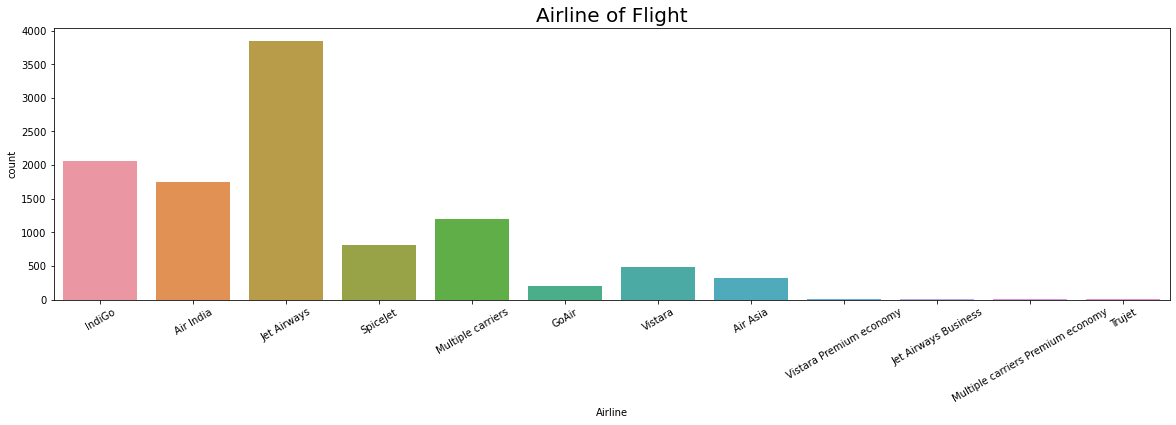

In [12]:
print(Flight_Train['Airline'].value_counts())
plt.figure(figsize = (20,5)) #Plotting with size of 10 * 5
ax=sns.countplot(x="Airline", data=Flight_Train) #Plotting Countplot for Airline
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Airline of Flight", fontsize = 20) #Setting up the title
plt.show() #plotting the graph

Mostly Jet Airways Airlines Filghts fly in sky.

## Bi-variate Analysis

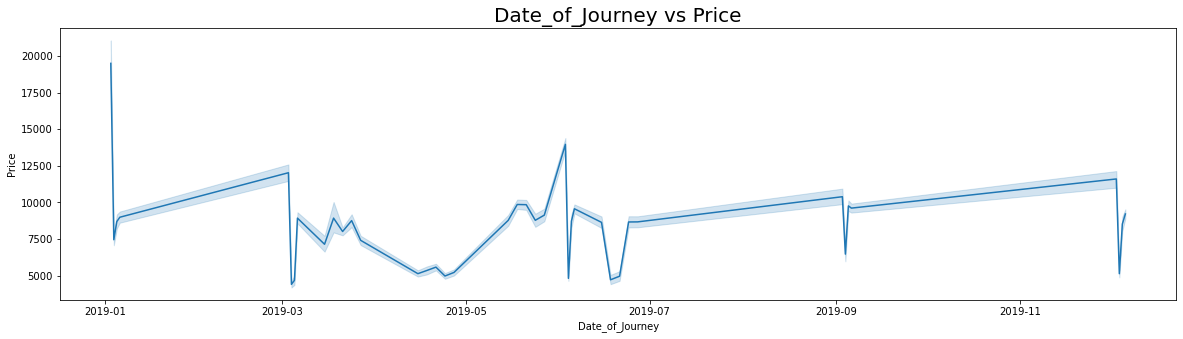

In [13]:
Flight_Train['Date_of_Journey'] = pd.to_datetime(Flight_Train['Date_of_Journey'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date_of_Journey",y="Price",  data=Flight_Train)
plt.title("Date_of_Journey vs Price", fontsize = 20)
plt.show()

In January starting Flight prices were high(20,000) than suddenly in dropped to 7500.
After that Flight prices slightly increaing from jcn to march 8000 to 12500.
In March and April flight prices are slightly decresing and incering multiple times.
From May to June prices are going high.
June and Juy prices are going up and down.
July till September price increasing suddenlt price down and than again it's going high till mid of november.

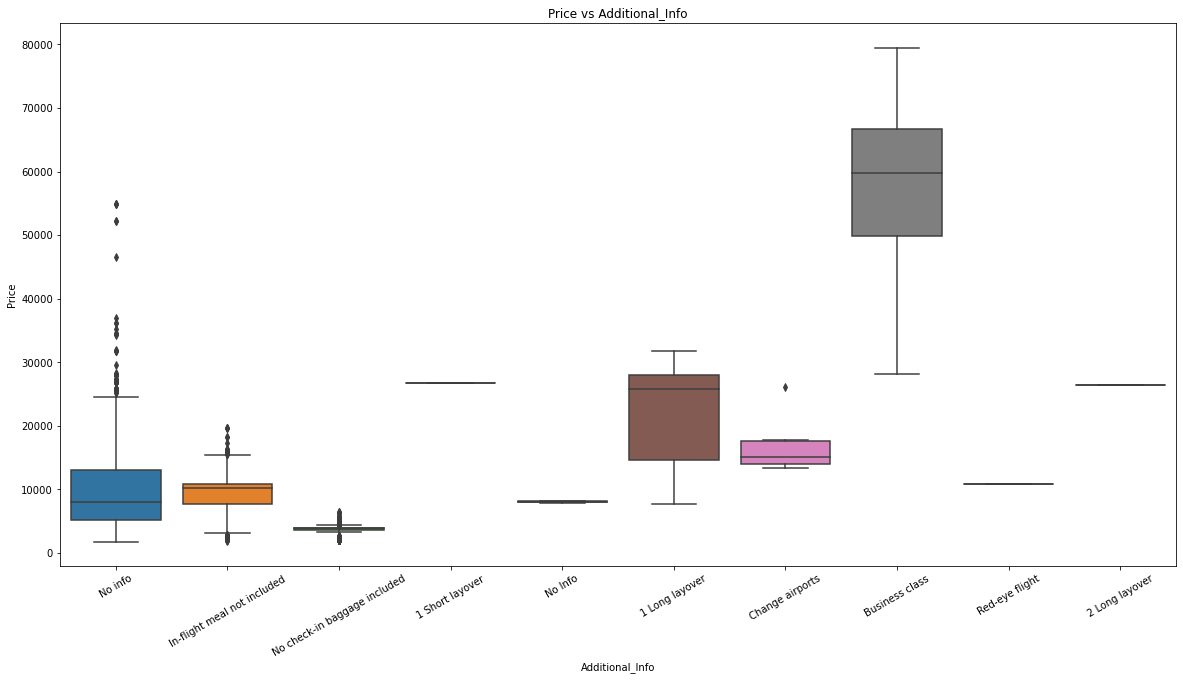

In [14]:
plt.figure(figsize = (20,10))
ax=sns.boxplot(Flight_Train['Additional_Info'], Flight_Train['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Price vs Additional_Info')
plt.show()

Here few things we can notice -
1. The Flight price is too low when No check-in baggage were allowed.
2. When customer choose Business Class that time Price goes too high.
2. When No meal provided in Flight that time flight prices are always lesser than 20,000.

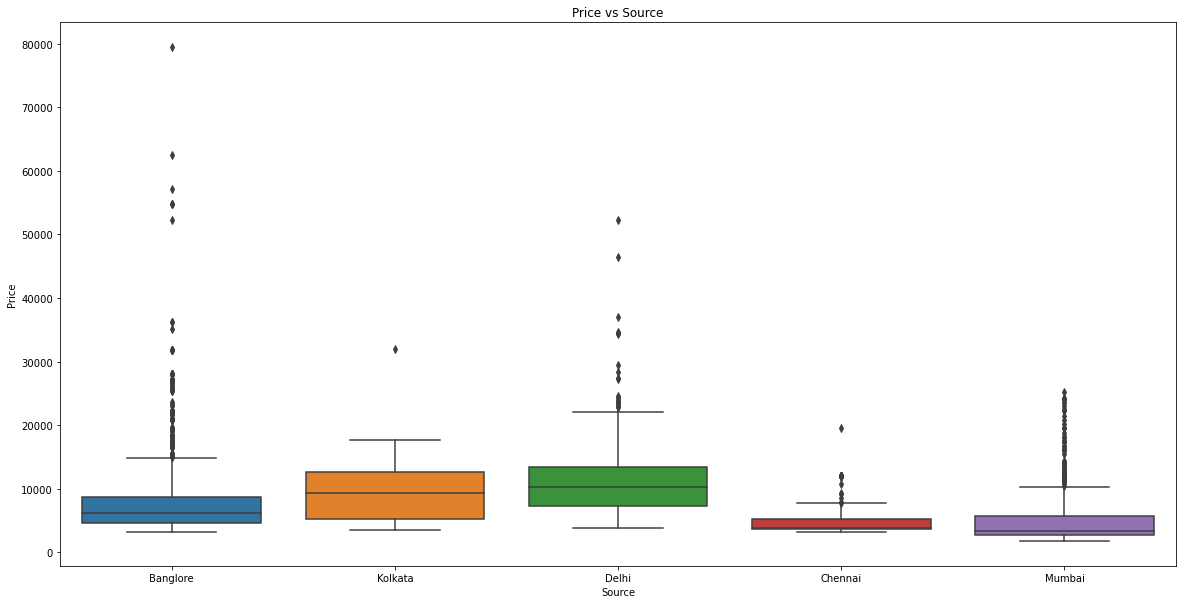

In [15]:
plt.figure(figsize = (20,10))
sns.boxplot(Flight_Train['Source'], Flight_Train['Price'])
plt.title('Price vs Source')
plt.show()

From Chennai and Mumbai the flights are cheaper as compared with other Sources

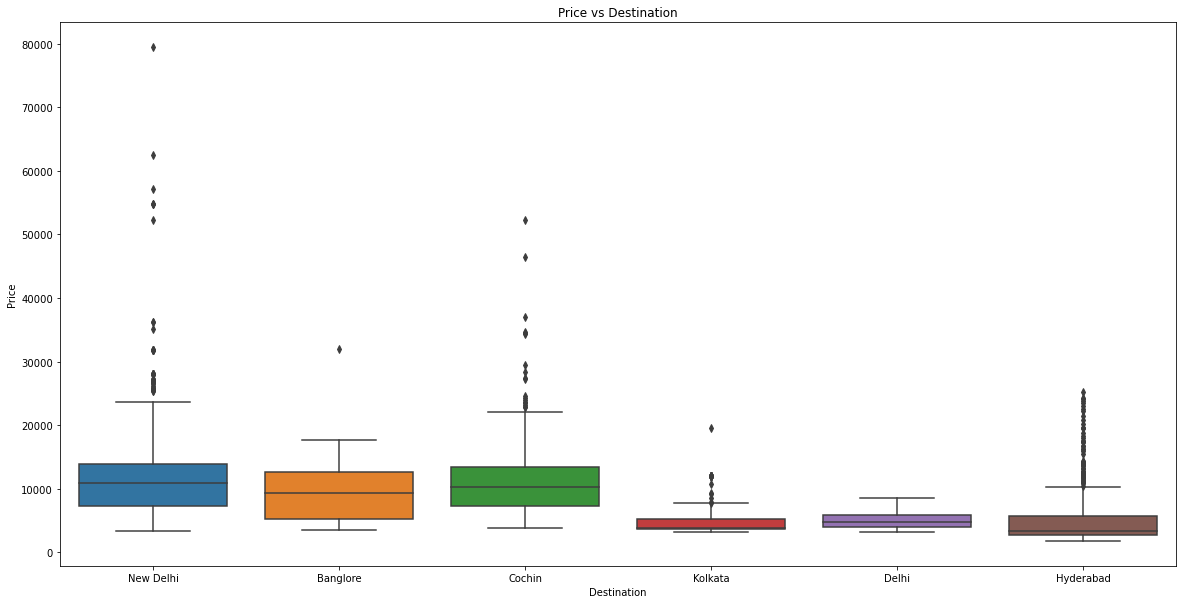

In [16]:
plt.figure(figsize = (20,10))
sns.boxplot(Flight_Train['Destination'], Flight_Train['Price'])
plt.title('Price vs Destination')
plt.show()

Kolkata, Delhi and Hyderabad flights are cheaper than other Destination price

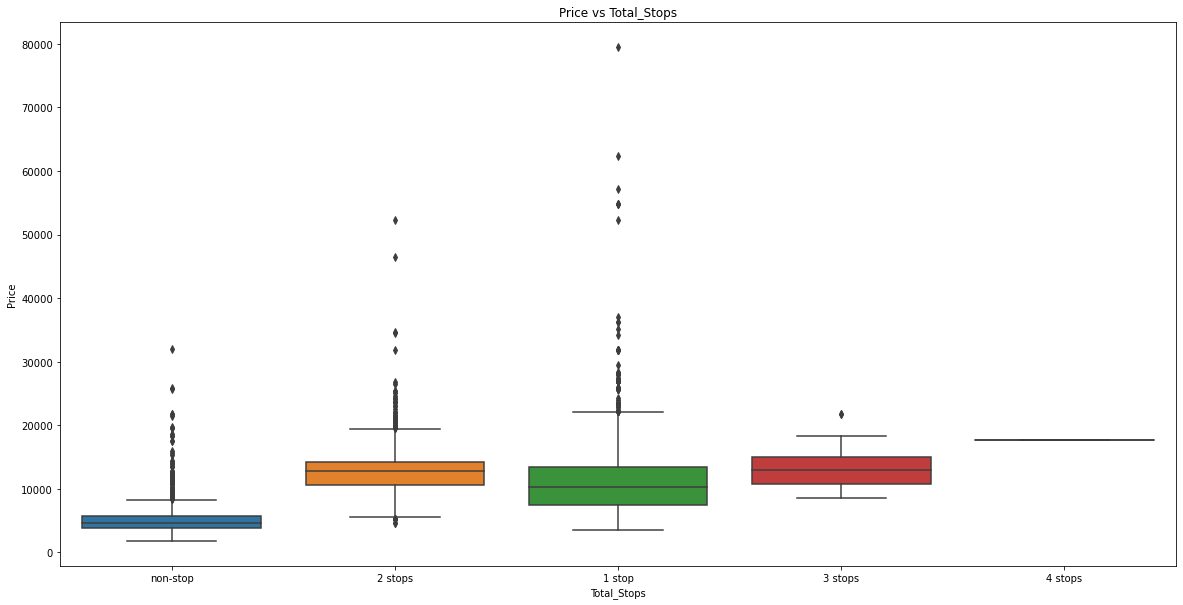

In [17]:
plt.figure(figsize = (20,10))
sns.boxplot(Flight_Train['Total_Stops'], Flight_Train['Price'])
plt.title('Price vs Total_Stops')
plt.show()

Non-Stops flights are cheaper

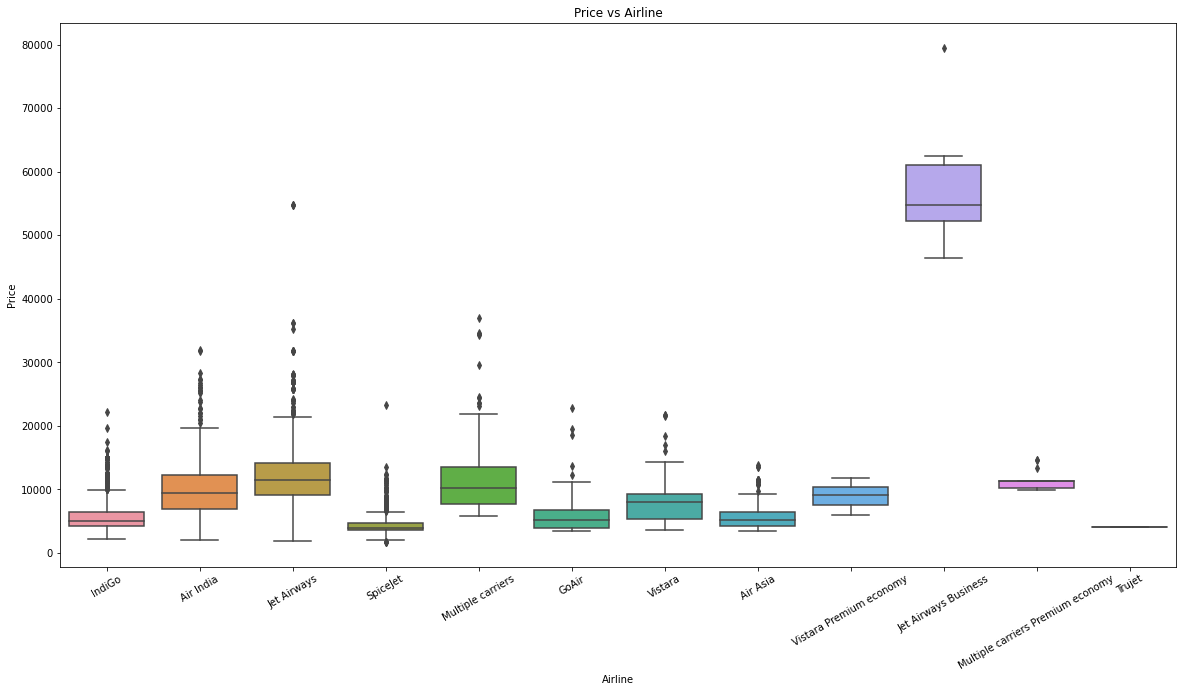

In [18]:
plt.figure(figsize = (20,10))
ax=sns.boxplot(Flight_Train['Airline'], Flight_Train['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Price vs Airline')
plt.show()

Jet Airways flights are always expencive and Spivejet flights are cheaper.

We'll do furter EDA after Feature Engineering and label Encoding

# Feature Engineering

In [19]:
#Checking the unique values will number count.
Flight_Train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

We can clearly see that No Info is No info, it's just typo error. So we'll fix it.

In [20]:
#Replacing No Info to No info.
Flight_Train["Additional_Info"]=Flight_Train["Additional_Info"].replace("No Info","No info")

In [21]:
#Checking the number of Total Stops
Flight_Train['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [22]:
#Replacing String to numeric for better prediction
Flight_Train.replace({"non-stop": 0, 
                      "1 stop": 1, 
                      "2 stops": 2, 
                      "3 stops": 3, 
                      "4 stops": 4
                     }, inplace = True)

In [23]:
#Checking value count of stops
Flight_Train['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [24]:
#Checking first 5 rows of data
Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [25]:
#Converting Duration from string to numbers
Flight_Train['hour'] = Flight_Train['Duration'].str.split("h").str[0]
Flight_Train['nothing'] = Flight_Train['Duration'].str.split(" ").str[1]
Flight_Train['minute'] = Flight_Train['nothing'].str.split("m").str[0]
Flight_Train.drop('nothing',axis=1,inplace=True)

In [26]:
Flight_Train['hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

We got 5m because the duration was 5m, Now we'll change hour to 0 and minute to 5

In [27]:
for i in range(0,10682):
    if(Flight_Train['hour'][i] == '5m'):
        Flight_Train["hour"][i] = 0
        Flight_Train["minute"][i] = 5

In [28]:
import numpy as np
Flight_Train['hour'] = pd.to_numeric(Flight_Train['hour']) #Converting object to numeric
Flight_Train['minute'] = pd.to_numeric(Flight_Train['minute']) #Converting object to numeric
Flight_Train['minute']=Flight_Train['minute'].replace(np.NaN,0) #Replacing null values with 0
Flight_Train['minute'] = Flight_Train['minute'].astype('int64') #Converting float to int
Flight_Train['Duration'] = Flight_Train['hour']*60 + Flight_Train['minute'] #Converting hours and minutes into minutes
Flight_Train.drop('hour',axis=1,inplace=True) #Dropping hour becuase work is over
Flight_Train.drop('minute',axis=1,inplace=True) #Dropping minute becuase work is over
Flight_Train.head() #Checking first 5 rows of data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302


In [29]:
#Converting Departure time into minutes
Flight_Train['Dep_Time'] = pd.to_datetime(Flight_Train['Dep_Time'],format = '%H:%M').dt.hour*60 + pd.to_datetime(Flight_Train['Dep_Time'],format = '%H:%M').dt.minute

In [30]:
#Converting date into numeric form
import datetime as dt
Flight_Train['Date_of_Journey'] = pd.to_datetime(Flight_Train['Date_of_Journey'])
Flight_Train['Date_of_Journey'] = Flight_Train['Date_of_Journey'].map(dt.datetime.toordinal)
Flight_Train.head() #Checking top 5 rows of dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,737142,Banglore,New Delhi,BLR → DEL,1340,01:10 22 Mar,170,0,No info,3897
1,Air India,737064,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,13:15,445,2,No info,7662
2,Jet Airways,737308,Delhi,Cochin,DEL → LKO → BOM → COK,565,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,737398,Kolkata,Banglore,CCU → NAG → BLR,1085,23:30,325,1,No info,6218
4,IndiGo,737062,Banglore,New Delhi,BLR → NAG → DEL,1010,21:35,285,1,No info,13302


In [31]:
#We have Total_Stops columns, So we don't need Route column
#We have Dep_Time and Duration that is equailent to Arrival time, So we don't need it.
Flight_Train.drop('Route',axis=1,inplace=True)
Flight_Train.drop('Arrival_Time',axis=1,inplace=True)

In [32]:
Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,737142,Banglore,New Delhi,1340,170,0,No info,3897
1,Air India,737064,Kolkata,Banglore,350,445,2,No info,7662
2,Jet Airways,737308,Delhi,Cochin,565,1140,2,No info,13882
3,IndiGo,737398,Kolkata,Banglore,1085,325,1,No info,6218
4,IndiGo,737062,Banglore,New Delhi,1010,285,1,No info,13302


# Label Encoding

In [33]:
#Label encoding for the object columns
label_list=list(Flight_Train.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #Initlize LabelEncoder to le 
for i in label_list:
    Flight_Train[i] = le.fit_transform(Flight_Train[i])

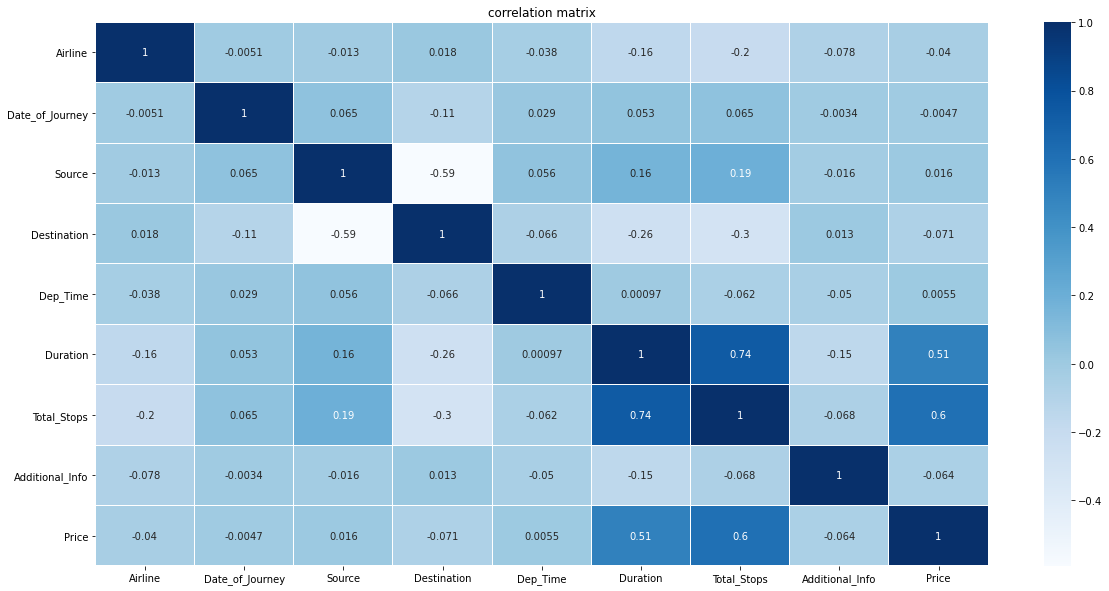

In [34]:
#Multivariate Analysis
fig=plt.figure(figsize=(20,10))
hc=Flight_Train.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Price is highly corelated with Duration and Total_Stops

In [35]:
Flight_Train.describe()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,737208.509033,1.952261,1.436113,773.852382,643.093232,0.824207,6.582140,9087.064121
std,2.352155,89.113653,1.177221,1.474782,344.964055,507.862001,0.675199,0.838073,4611.359167
min,0.000000,737062.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,1759.000000
25%,3.000000,737142.000000,2.000000,0.000000,480.000000,170.000000,0.000000,7.000000,5277.000000
50%,4.000000,737203.000000,2.000000,1.000000,710.000000,520.000000,1.000000,7.000000,8372.000000
75%,4.000000,737237.000000,3.000000,2.000000,1085.000000,930.000000,1.000000,7.000000,12373.000000
max,11.000000,737399.000000,4.000000,5.000000,1435.000000,2860.000000,4.000000,8.000000,79512.000000


There is difference between Mean and std of Price of Outliers must be present in it.

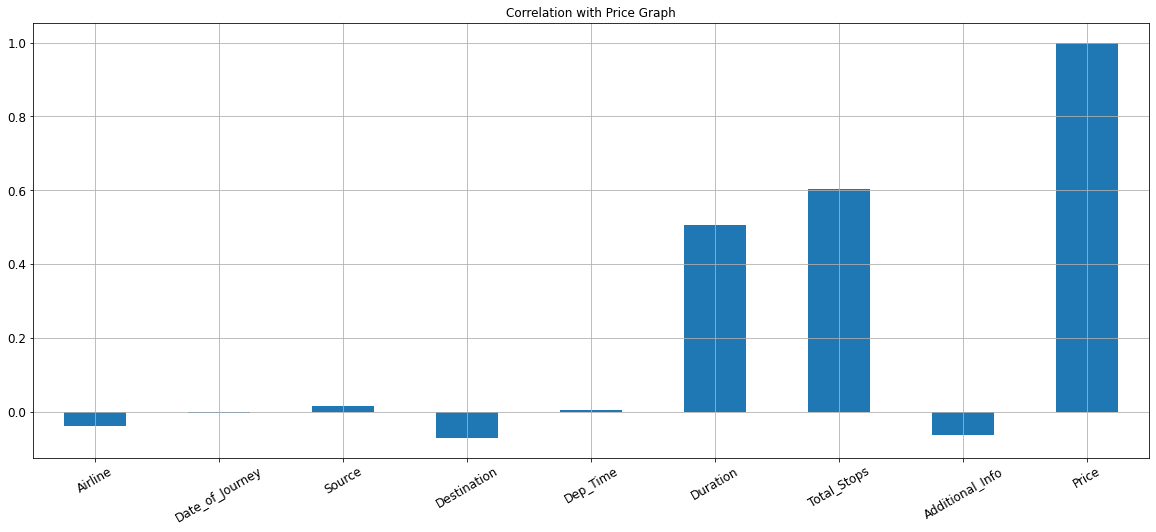

In [36]:
#Correlation with Price with respect to attributes
Flight_Train.corrwith(Flight_Train.Price).plot.bar(
        figsize = (20, 8), title = "Correlation with Price Graph", fontsize = 12,
        rot = 30, grid = True)

As we saw earlier Duration and Total_Stops are heighly corealted with Price

# Removing Skewness and Outliers

In [37]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Flight_Train))
print(np.where(z>3))

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
         657,   785,   785,   826,   919,   936,   946,   959,   966,
         969,   975,  1043,  1067,  1113,  1196,  1218,  1246,  1341,
        1346,  1424,  1442,  1466,  1478,  1496,  1551,  1629,  1654,
        1657,  1665,  1712,  1785,  1791,  1804,  1918,  2055,  2079,
        2099,  2108,  2172,  2172,  2405,  2481,  2495,  2495,  2553,
        2556,  2556,  2618,  2623,  2633,  2635,  2641,  2654,  2693,
        2718,  2718,  2814,  2822,  2883,  2924,  2924,  3032,  3032,
        3111,  3111,  3157,  3220,  3257,  3317,  3400,  3457,  3496,
        3535,  3535,  3568,  3584,  3700,  3700,  3788,  3790,  3815,
        3815,  3945,  3966,  4012,  4047,  4118,  4118,  4463,  4463,
        4521,  4521,  4655,  4655,  4676,  4760,  4829,  5013,  5013,
        5050,  5136,  5372,  5372,  5439,  5446,  5516,  5628,  5662,
        5701,  5701,  5710,  5711,  5719,  5738,  5745,  5782,  5838,
        5856,  5933

In [38]:
z=np.abs(zscore(Flight_Train))
threshold=3
new_Flight_Train=Flight_Train[(z<3).all(axis=1)]
print(Flight_Train.shape)
print(new_Flight_Train.shape)

(10683, 9)
(10475, 9)


In [39]:
#checking for how much data we lost
loss_percent=(10683-10475)/10683*100
print(loss_percent)

1.9470186277262942


We lost almost 2% of our data, which is not bad.

In [40]:
#Checking skewness of all columns
new_Flight_Train.skew()

Airline            0.730109
Date_of_Journey    0.486566
Source            -0.438959
Destination        1.266475
Dep_Time           0.113216
Duration           0.779912
Total_Stops        0.230633
Additional_Info   -1.468582
Price              0.415788
dtype: float64

In [41]:
new_Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,3,737142,0,5,1340,170,0,7,3897
1,1,737064,3,0,350,445,2,7,7662
2,4,737308,2,1,565,1140,2,7,13882
3,3,737398,3,0,1085,325,1,7,6218
4,3,737062,0,5,1010,285,1,7,13302


In [42]:
#Removing skewness
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in new_Flight_Train.columns:
    if abs(new_Flight_Train.loc[:,i].skew())>0.55:
        new_Flight_Train.loc[:,i]=PT.fit_transform(new_Flight_Train.loc[:,i].values.reshape(-1,1))

In [43]:
new_Flight_Train.skew()

Airline           -0.013402
Date_of_Journey    0.486566
Source            -0.438959
Destination        0.041017
Dep_Time           0.113216
Duration          -0.046552
Total_Stops        0.230633
Additional_Info   -1.136146
Price              0.415788
dtype: float64

# Seperating Input and Output Variables

In [44]:
y = new_Flight_Train["Price"]
x = new_Flight_Train.drop(["Price"], axis=1)

# Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,0.419360,0.237389,0.00,1.000000,0.932862,0.482236,0.0,0.165293
1,0.176956,0.005935,0.75,0.000000,0.233216,0.660378,1.0,0.165293
2,0.515086,0.729970,0.50,0.440768,0.385159,0.856249,1.0,0.165293
3,0.419360,0.997033,0.75,0.000000,0.752650,0.599840,0.5,0.165293
4,0.419360,0.000000,0.00,1.000000,0.699647,0.575230,0.5,0.165293


# Finding Best Random State

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.5433243452764487  on Random_state  360


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [48]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [49]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [50]:
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.5433243452764487
Mean Absolute Error:      2157.0645389788497
Mean Squared error:       7470645.752834696
Root Mean Squared Error:  2733.24820549373
[0.5218934  0.51507901 0.54378328 0.5228583  0.49113157 0.51343271
 0.48271281 0.5369189 ]
cross validation score:   0.515976248246264
Difference between R2 score and cross validatio score is -  0.027348097030184704
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.88590355446467

Random Forest Regressor model have heighest accuracy i.e. 88.59% with 88.77% cross validation score which is good and the difference is too less.

# Hyper Parameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":range(21,25),
              "criterion":['mse'],
              "max_features": ['auto', 'sqrt'],
              "min_samples_leaf":range(1,5)}

clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'criterion': 'mse',
 'max_depth': 22,
 'max_features': 'auto',
 'min_samples_leaf': 1}

In [52]:
clf_pred=clf.best_estimator_.predict(x_test)

In [53]:
r2_score(y_test, clf_pred)

0.8861565029246709

Our model learnt Almost 89% .

# Saving the model

In [54]:
import joblib
joblib.dump(clf.best_estimator_,"PJ7_Flight.obj")
RF_from_joblib=joblib.load('PJ7_Flight.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([10480.86      , 10515.74      , 12352.53      , ...,
        7747.29033333,  9315.82718222,  4954.65      ])

In [55]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0         1         2        3        4       5         6  \
Predicted  10480.86  10515.74  12352.53  3326.18  6566.44  5932.9  12623.28   
Original    5567.00   8372.00  12898.00  3210.00  6093.00  5073.0  13663.00   

                      7        8         9      10      11       12       13  \
Predicted  12151.468393  8575.99  14662.83  7229.0  5201.4  6026.48  12376.1   
Original   13504.000000  9187.00  14781.00  7229.0  4668.0  5386.00  12395.0   

                 14        15            16       17      18       19  \
Predicted  10466.88  16630.38  11781.652167  3393.62  5001.9  6575.56   
Original   11410.00  15025.00  11668.000000  4392.00  5613.0  8040.00   

                     20           21       22       23           24  \
Predicted  10861.484866  7251.326667  7792.65  5802.26  7551.236667   
Original    9001.000000  5126.000000  7832.00  6961.00  8851.000000   

                    25        26        27           28        29       30  \
Predicted  4675.752254   9091.46  5367.868  4619.667323  13460.42  6020.33   
Original   4823.000000  10203.00  5228.000  4823.000000  13364.00  5963.00   

                31       32           33       34       35       36        37  \
Predicted  9392.89  6949.48  8746.354071  12898.0  7244.74  12898.0   9219.67   
Original   8147.00  6860.00  6795.000000  12898.0  7229.00  12898.0  10696.00   

                    38        39           40       41           42        43  \
Predicted  4728.286359  12768.72  9525.361523  5467.03  4317.020793  16025.44   
Original   4804.000000  11467.00  8601.000000  5201.00  4174.000000  16289.00   

                  44       45           46        47          48  \
Predicted  5846.9215  7362.79  3736.162926  15134.94  15083.7425   
Original   6934.0000  7229.00  3597.000000  15129.00  15129.0000   

                     49           50       51            52            53  \
Predicted  11882.168063  8860.477314  3847.66  12433.654167  12546.687642   
Original    7198.000000  6513.000000  3841.00   9417.000000  12646.000000   

                54      55        56        57        58        59  \
Predicted  5365.51  7064.0  8683.995  9089.509  11067.47  11288.83   
Original   4544.00  7064.0  8728.000  6645.000  11087.00   9134.00   

                    60           61       62        63        64       65  \
Predicted  4277.492771  8173.732492  5215.82  17115.56  10647.47  3815.77   
Original   4488.000000  7258.000000  4544.00  17261.00  10441.00  3807.00   

                     66       67            68       69        70      71  \
Predicted  11933.968111  5855.48  11504.005631  3564.03  6596.488  4558.2   
Original   12093.000000  4483.00   7198.000000  2754.00  5601.000  4050.0   

                 72       73        74           75       76        77  \
Predicted  10620.65  9063.31  11433.98  7987.349048  9390.59  17458.41   
Original   10844.00  8586.00  11213.00  6953.000000  9968.00  16775.00   

                 78        79           80            81        82  \
Predicted  13081.07  10847.12  4601.328044   9713.038777  13054.15   
Original   13044.00  14871.00  4804.000000  10678.000000  13029.00   

                    83       84       85           86       87       88  \
Predicted  8561.905708  6345.17  6293.52  6794.590308  16813.1  3672.92   
Original   9100.000000  6314.00  6195.00  6818.000000  16274.0  3332.00   

                  89       90       91      92            93           94  \
Predicted  12132.135  4703.54  3844.06  6370.5  17228.491429  9135.835103   
Original   11793.000  4145.00  5725.00  6093.0  17493.000000  8018.000000   

                95        96        97          98       99      100      101  \
Predicted  3671.06  14222.89  15529.34  15322.9215  7367.42  7072.13  6769.55   
Original   3543.00  13941.00  18752.00  17057.0000  7229.00  6069.00  6494.00   

                102      103      104     105      106          107  \
Predicted  16276.65  2431.94  5931.66  9090.8  3912.87  4786.94

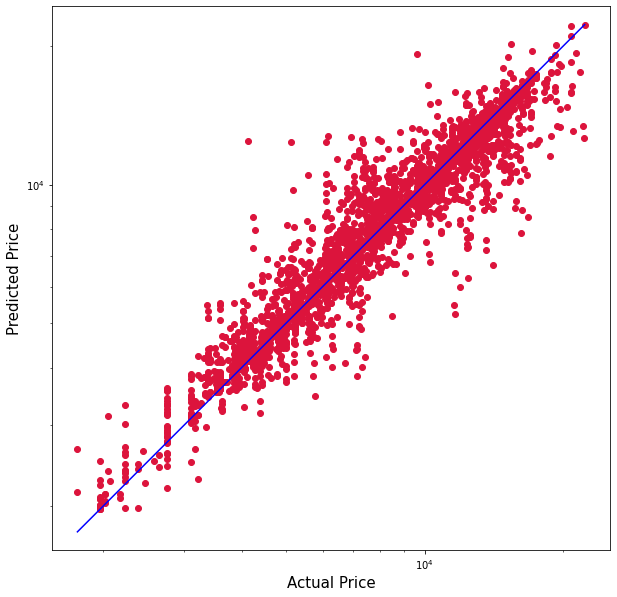

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test))
p2 = min(min(Predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')
plt.show()

# Test Data

In [57]:
Flight_Test=pd.read_excel("Flight_Test.xlsx") #reading Flight_Train.xlsx file
Flight_Test.head() #Looking into top 5 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [58]:
#Replacing null values with mode becuase the type of objects are object
Flight_Test['Route'].fillna(Flight_Test['Route'].mode()[0], inplace=True)
Flight_Test['Total_Stops'].fillna(Flight_Test['Total_Stops'].mode()[0], inplace=True)

In [59]:
#Replacing No Info to No info.
Flight_Test["Additional_Info"]=Flight_Test["Additional_Info"].replace("No Info","No info")

In [60]:
#Replacing String to numeric for better prediction
Flight_Test.replace({"non-stop": 0, 
                      "1 stop": 1, 
                      "2 stops": 2, 
                      "3 stops": 3, 
                      "4 stops": 4
                     }, inplace = True)

In [61]:
#Converting Duration from string to numbers
Flight_Test['hour'] = Flight_Test['Duration'].str.split("h").str[0]
Flight_Test['nothing'] = Flight_Test['Duration'].str.split(" ").str[1]
Flight_Test['minute'] = Flight_Test['nothing'].str.split("m").str[0]
Flight_Test.drop('nothing',axis=1,inplace=True)

In [62]:
Flight_Test.shape

(2671, 12)

In [63]:
for i in range(0,2670):
    if(Flight_Test['hour'][i] == '5m'):
        Flight_Test["hour"][i] = 0
        Flight_Test["minute"][i] = 5

In [64]:
Flight_Test['hour'] = pd.to_numeric(Flight_Test['hour']) #Converting object to numeric
Flight_Test['minute'] = pd.to_numeric(Flight_Test['minute']) #Converting object to numeric
Flight_Test['minute']=Flight_Test['minute'].replace(np.NaN,0) #Replacing null values with 0
Flight_Test['minute'] = Flight_Test['minute'].astype('int64') #Converting float to int
Flight_Test['Duration'] = Flight_Test['hour']*60 + Flight_Test['minute'] #Converting hours and minutes into minutes
Flight_Test.drop('hour',axis=1,inplace=True) #Dropping hour becuase work is over
Flight_Test.drop('minute',axis=1,inplace=True) #Dropping minute becuase work is over
Flight_Test.head() #Checking first 5 rows of data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,0,No info


In [65]:
#Converting Departure time into minutes
Flight_Test['Dep_Time'] = pd.to_datetime(Flight_Test['Dep_Time'],format = '%H:%M').dt.hour*60 + pd.to_datetime(Flight_Test['Dep_Time'],format = '%H:%M').dt.minute

In [66]:
#Converting date into numeric form
import datetime as dt
Flight_Test['Date_of_Journey'] = pd.to_datetime(Flight_Test['Date_of_Journey'])
Flight_Test['Date_of_Journey'] = Flight_Test['Date_of_Journey'].map(dt.datetime.toordinal)
Flight_Test.head() #Checking top 5 rows of dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,737216,Delhi,Cochin,DEL → BOM → COK,1050,04:25 07 Jun,655,1,No info
1,IndiGo,737398,Kolkata,Banglore,CCU → MAA → BLR,380,10:20,240,1,No info
2,Jet Airways,737200,Delhi,Cochin,DEL → BOM → COK,1155,19:00 22 May,1425,1,In-flight meal not included
3,Multiple carriers,737200,Delhi,Cochin,DEL → BOM → COK,480,21:00,780,1,No info
4,Air Asia,737234,Banglore,Delhi,BLR → DEL,1435,02:45 25 Jun,170,0,No info


In [67]:
#We have Total_Stops columns, So we don't need Route column
#We have Dep_Time and Duration that is equailent to Arrival time, So we don't need it.
Flight_Test.drop('Route',axis=1,inplace=True)
Flight_Test.drop('Arrival_Time',axis=1,inplace=True)

In [68]:
Flight_Test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,737216,Delhi,Cochin,1050,655,1,No info
1,IndiGo,737398,Kolkata,Banglore,380,240,1,No info
2,Jet Airways,737200,Delhi,Cochin,1155,1425,1,In-flight meal not included
3,Multiple carriers,737200,Delhi,Cochin,480,780,1,No info
4,Air Asia,737234,Banglore,Delhi,1435,170,0,No info


In [69]:
#Label encoding for the object columns
label_list=list(Flight_Test.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #Initlize LabelEncoder to le 
for i in label_list:
    Flight_Test[i] = le.fit_transform(Flight_Test[i])

In [70]:
z=np.abs(zscore(Flight_Test))
print(np.where(z>3))

(array([  72,  251,  251,  484,  510,  673,  725,  786,  875,  877,  954,
       1022, 1271, 1279, 1379, 1511, 1554, 1686, 1689, 1689, 1781, 1802,
       1861, 1918, 1945, 2021, 2114, 2359, 2422, 2442, 2472, 2487, 2492],
      dtype=int64), array([6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 7,
       7, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5], dtype=int64))


In [71]:
z=np.abs(zscore(Flight_Test))
threshold=3
new_Flight_Test=Flight_Test[(z<3).all(axis=1)]
print(Flight_Test.shape)
print(new_Flight_Test.shape)

(2671, 8)
(2640, 8)


In [72]:
#checking for how much data we lost
loss_percent=(2671-2640)/2671*100
print(loss_percent)

1.1606140022463498


In [73]:
#Removing skewness from non object columns
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in new_Flight_Test.columns:
    if abs(new_Flight_Test.loc[:,i].skew())>0.55:
        new_Flight_Test.loc[:,i]=PT.fit_transform(new_Flight_Test.loc[:,i].values.reshape(-1,1))

In [74]:
x=new_Flight_Test

In [75]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,0.4,0.456973,0.50,0.439690,0.726950,0.723130,0.5,1.0
1,0.3,0.997033,0.75,0.000000,0.251773,0.523724,0.5,1.0
2,0.4,0.409496,0.50,0.439690,0.801418,0.899682,0.5,0.0
3,0.6,0.409496,0.50,0.439690,0.322695,0.761021,0.5,1.0
4,0.0,0.510386,0.00,0.664262,1.000000,0.461984,0.0,1.0


In [76]:
Predicted = RF_from_joblib.predict(x)
Predicted

array([ 6198.11      ,  4629.32      ,  8489.07      , ...,
       12919.61      , 11361.35      ,  9837.14040901])